In [1]:
"""
[Support Vector Machine]
We want to maximum the margin.

Margin (Separating hyperplane):
    The distance between the decision boundary and traing data.
    Get smaller generalization error. Smaller margin, easier to overfit.
    2 hyperplanes parallel with the descision boundary:
        Positive hyperplane : w0 + transpose(W) * Xpos = 1
        Negative hyperplane : w0 + transpose(W) * Xneg = -1
        add up 2 hyperplanes above => transpose(W) * (Xpos - Xneg) = 2
        Length of W : ||W|| = sqrt(sum[from j = 1 to m]{wj ^ 2})
        Normalized : (transpose(W) * (Xpos - Xneg)) / ||W|| = 2 / ||W||
            Left part of equation is distance between pos. and neg. hyperplanes => The margin we want to maximize.

Objective function:
    Maximize 2 / ||W||, make objective fucntion becomes the maximum of margin.
    Positive samples : w0 + transpose(W) * Xpos(i) >= 1 if y(i) = 1 [Should stay at positive hyperplane.]
    Negative samples : w0 + transpose(W) * Xneg(i) < -1 if y(i) = -1 [Sould stay at negative hyperplane.]
    => y(i) * (w0 + transpose(W) * X(i)) >= 1 for all i.
    For easier to process, we want minimize ((||w||) ^ 2) / 2, use quadratic programming to solve.

Slack variable (ξ):
    In suitable false classification with cost penalization, linear constraint need to be relaxed,
    so it can make nonlinear separable data converge.
    Positive samples : w0 + transpose(W) * Xpos(i) >= 1 if y(i) = 1 - ξ(i)
    Negative samples : w0 + transpose(W) * Xneg(i) < -1 if y(i) = -1 + ξ(i)
    New objective is find minimum of (((||w||) ^ 2) / 2) + C * sum[for all i]{ξ(i)}
    C is for controlling penalty, bigger is stronger. Bigger C will get higher bias but lower variance.
"""
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from shared import Plot

In [2]:
# Get Iris data
"""
Features:
0 => sepal length in cm
1 => sepal width in cm
2 => petal length in cm
3 => petal width in cm


Target labels:
1 => Iris-Setosa
2 => Iris-Versicolor
3 => Iris-Virginica
"""
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
# Get training & test data
"""
Settings:
30 % for test, 70 % for training
"""
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [4]:
# Standarized
sc = StandardScaler()
sc.fit(X_train)  # Compute the mean and std to be used for later scaling
X_train_std = sc.transform(X_train)  # Standarized X_train
X_test_std = sc.transform(X_test)  # Standarized X_test

In [5]:
# Support vector classifier
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

Plot results...


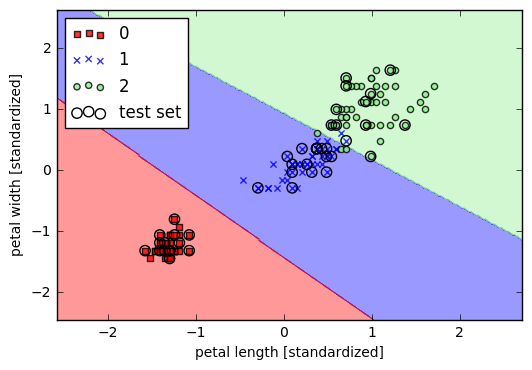

In [6]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [7]:
# Support vector classifier w/ SGD
svm = SGDClassifier(loss='hinge', random_state=0)
svm.fit(X_train_std, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=0, shuffle=True, verbose=0,
       warm_start=False)

Plot results...


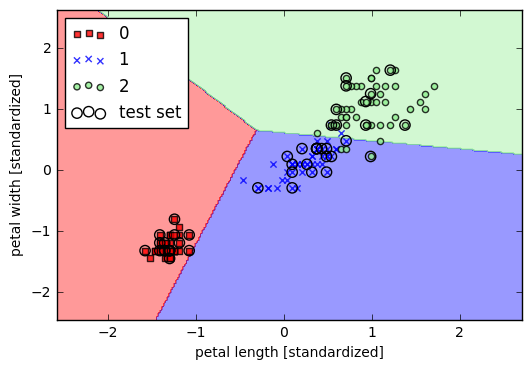

In [8]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()